In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text
import cartopy
import cartopy.crs as ccrs
import geoplot
import geoplot.crs as gcrs
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/R-graph-gallery/master/DATA/world.geojson"
world = gpd.read_file(url)
world = world[~world['name'].isin(["Antarctica"])]
world = world.to_crs(proj.proj4_init)
df = pd.read_csv('data.csv')

def convert_lat_long(coord):
   try:
      if coord[-1] == 'N':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'S':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'E':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", ".").replace(":", "."))
      elif coord[-1] == 'W':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
   except:
      print(coord)
      return None
df['Latitude'] = df['Latitude'].apply(convert_lat_long)
df['Longitude'] = df['Longitude'].apply(convert_lat_long)

df = df[df['Latitude'].abs() <= 90]
df = df[df['Longitude'].abs() <= 180]
df = df[df['Magnitude'] <= 10]

def get_year(date):
   return date[-4:]
df['year'] = df['Date'].apply(get_year).astype(float)

df.sample(10)

2.7.37 N


,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map,year
2117,16/12/2023,09:58:27,Turkmenistan,3.6,100,36.14,62.46,M,-,2023.0
7135,10/06/2019,14:43:11,Vanuatu Islands.,4.3,180,-16.12,168.00,A,-,2019.0
4570,23/08/2021,03:58:43,"Hindu Kush Region, Afghanistan",2.9,10,34.47,61.70,M,-,2021.0
2462,24/11/2023,20:35:01,Off Cosrt of Pakistan,3.1,14,24.84,61.78,A,-,2023.0
5180,26/09/2020,12:40:37,"Hindu Kush Region,Afghanistan",3.0,200,36.84,70.49,M,-,2020.0
7320,16/05/2019,04:04:56,Peru-Ecuador Border Region.,4.7,128,-2.28,-76.76,A,-,2019.0
8469,10/01/2019,14:51:01,Southeastern Afghanistan,3.9,155,34.80,66.70,M,-,2019.0
12178,08/06/2017,11:00:00,30 KM NW of Mingora,3.2,35,34.80,72.70,M,-,2017.0
3206,13/07/2023,16:42:39,"Hindu Kush Region,Afghanistan",3.5,100,36.32,70.93,M,-,2023.0
7737,29/03/2019,08:54:17,Banda Sea.,4.9,5,-6.59,129.10,A,-,2019.0


In [113]:
df.Region.value_counts().head(10)

Region
Hindu Kush Region, Afghanistan          1571
Afghanistan-Tajikistan Border Region    1200
Hindu Kush Region,Afghanistan            657
Tajikistan                               452
Southeastern Afghanistan                 228
Banda Sea                                181
Fiji Islands Region                      172
Mindanao, Philippines                    171
Southern Xinjiang, China                 160
Tajikistan-Xinjiang Border Region        152
Name: count, dtype: int64

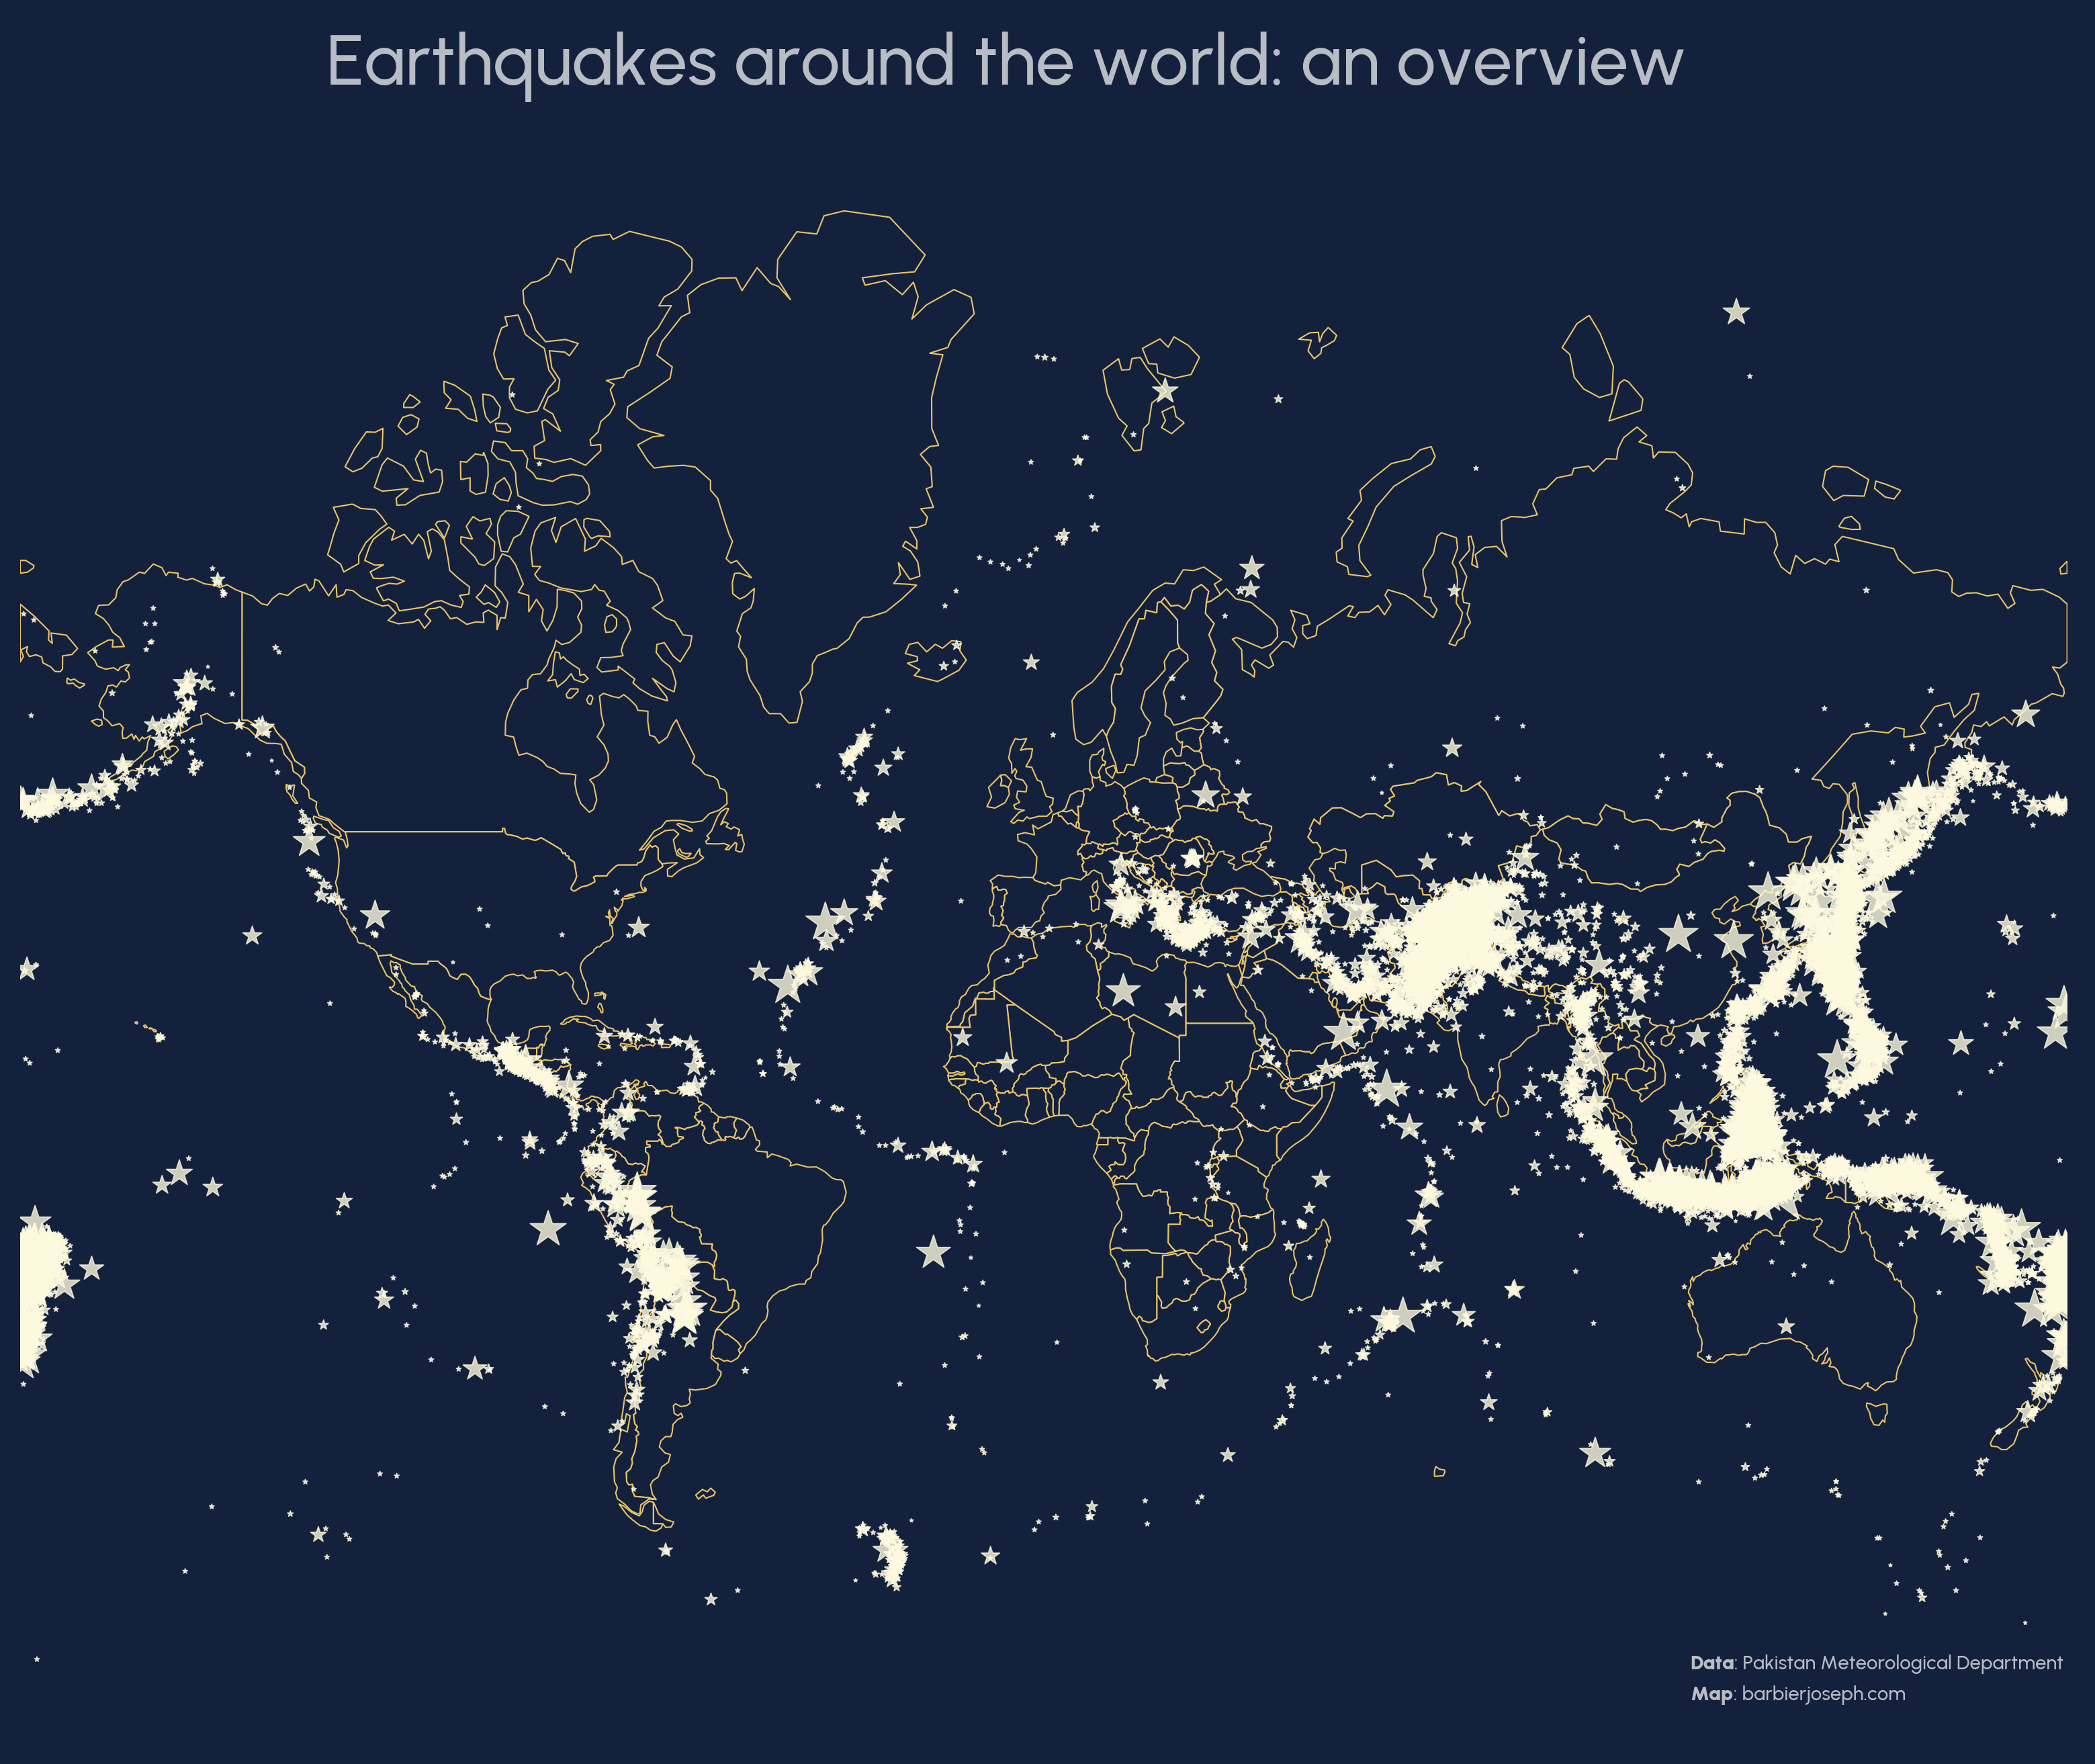

In [138]:
# !!! change it to your path
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'Urbanist-Medium.ttf'
font = FontProperties(fname=font_path)
font_path = personal_path + 'Urbanist-Black.ttf'
bold_font = FontProperties(fname=font_path)

# colors
background_color = '#14213d'
map_color = '#e9c46a'
map_edgecolor = 'black'
text_color = 'white'
alpha_text = 0.7
cmap = load_cmap("Esox_lucius", type='continuous')

# projection
proj = ccrs.Mercator()

# initialize the figure
fig, ax = plt.subplots(figsize=(15, 10), dpi=300, subplot_kw={'projection':proj})
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax, edgecolor=map_color, linewidth=0.5, facecolor=background_color)

# transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
moll_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# bubble on top of the map
ax.scatter(
   moll_coords[:, 0], moll_coords[:, 1],
   s=df['Depth (km)']/3,
   marker='*',
   color='#fefae0',
   linewidth=0.4,
   alpha=0.8,
   zorder=10,
)

# title
fig_text(
   x=0.5, y=0.96, s='Earthquakes around the world: an overview',
   color=text_color, fontsize=25, ha='center', va='top', font=font,
   alpha=alpha_text
)

# credit
text = """
<Data>: Pakistan Meteorological Department
<Map>: barbierjoseph.com
"""
fig_text(
   x=0.85, y=0.16, s=text, color=text_color, fontsize=7, ha='right', va='top',
   font=font, highlight_textprops=[{'font': bold_font}, {'font': bold_font}],
   alpha=alpha_text
)

plt.savefig('map.png', dpi=300)
plt.show()

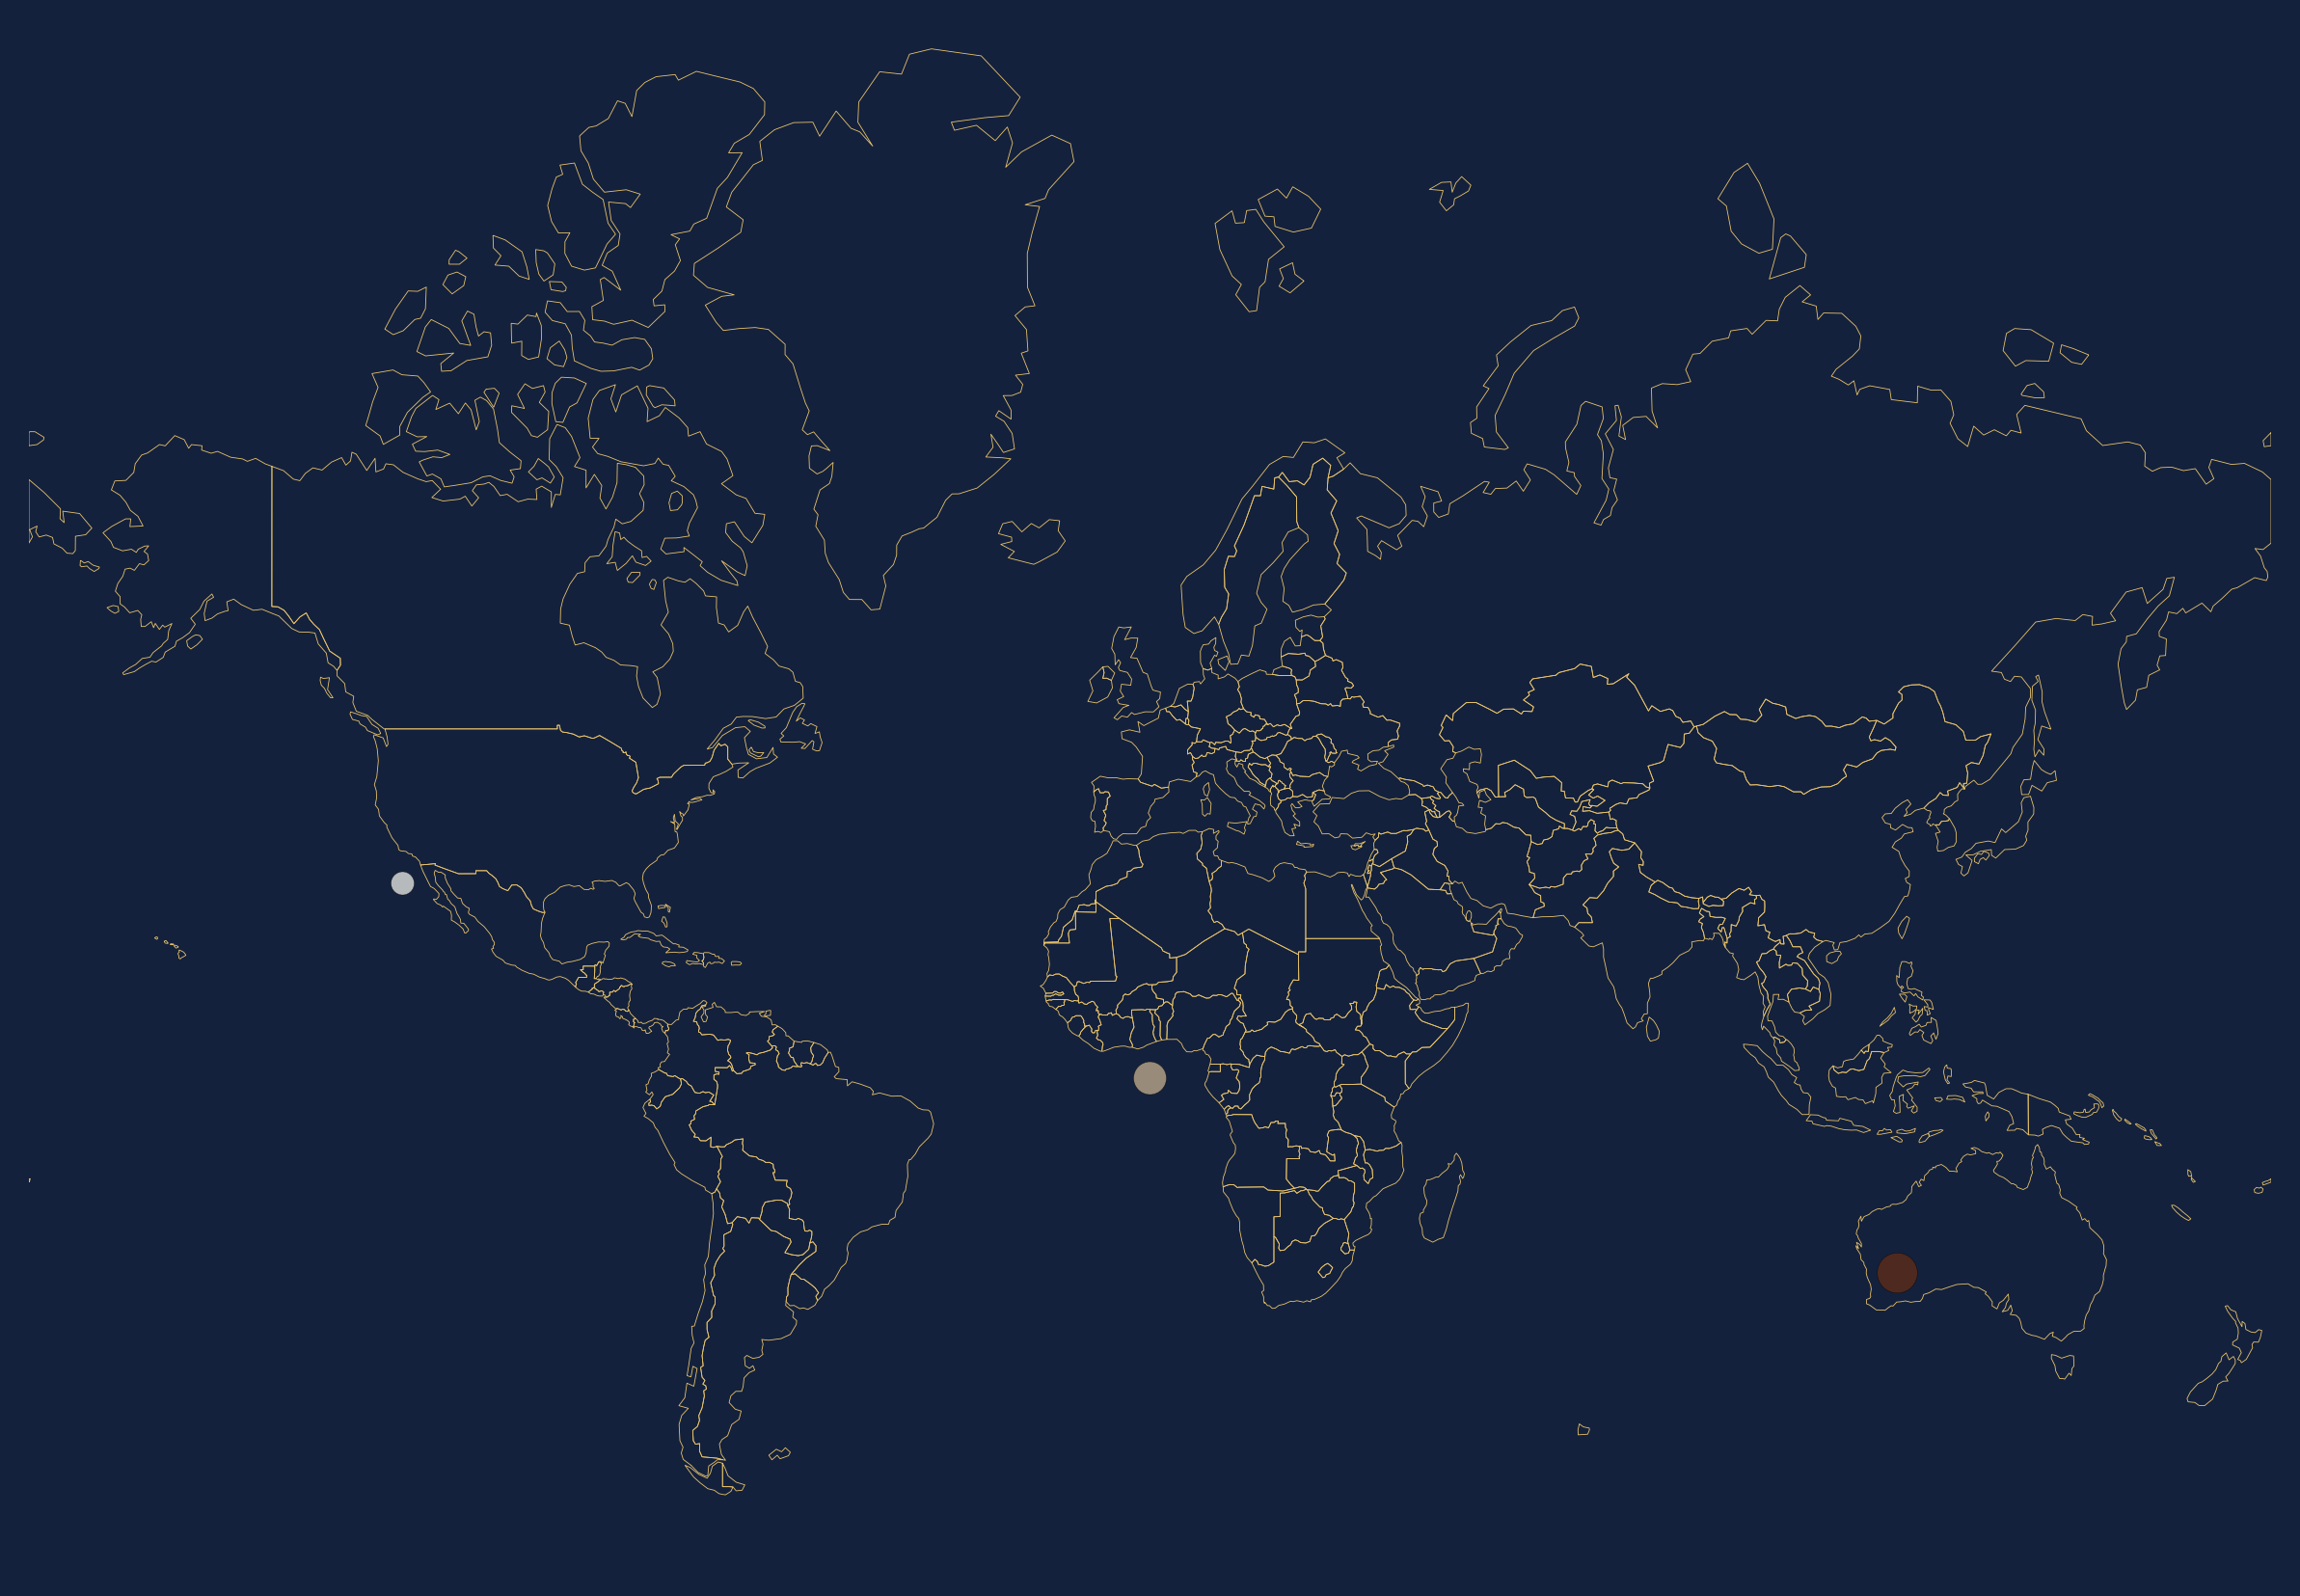

In [90]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import pandas as pd
from matplotlib.font_manager import FontProperties

# !!! change it to your path
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'Urbanist-Medium.ttf'
font = FontProperties(fname=font_path)
font_path = personal_path + 'Urbanist-Black.ttf'
bold_font = FontProperties(fname=font_path)

# colors
background_color = '#14213d'
map_color = '#e9c46a'
map_edgecolor = 'black'
text_color = 'white'
alpha_text = 0.7

# projection
proj = ccrs.Mercator()

# initialize the figure
fig, ax = plt.subplots(figsize=(10, 10), dpi=300, subplot_kw={'projection': proj})
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

world = gpd.read_file(url)
world = world[~world['name'].isin(["Antarctica"])]
world = world.to_crs(proj.proj4_init)
world.boundary.plot(ax=ax, edgecolor=map_edgecolor, linewidth=0.2, color=map_color)

# Sample DataFrame
df = pd.DataFrame({
    'Longitude': [-120, 0, 120],
    'Latitude': [30, 0, -30],
    'Depth (km)': [100, 200, 300]
})

# Transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
moll_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# Bubble on top of the map
sc = ax.scatter(
    moll_coords[:, 0], moll_coords[:, 1],
    s=df['Depth (km)'] / 3,
    c=df['Depth (km)'],
    edgecolor='black',
    cmap=cmap,
    linewidth=0.1,
    alpha=0.8,
    zorder=10
)

plt.show()
